<a href="https://colab.research.google.com/github/victorm0202/emed22/blob/main/9_manifolds_spectral_clust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="figs/logocimat.png" height="20%" width="20%"  align="center"/>

# <center> Ciencia de Datos<center>

<center> Víctor Muñiz Sánchez <center>
<center> Maestría en Cómputo Estadístico <center>
<center> Enero a junio 2022 <center>


## Spectral clustering. Ejemplo 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
from skimage.io import imread
from skimage.color import rgb2gray
from PIL import Image
import cv2
import matplotlib.pylab as pylab

%matplotlib inline

import os
os.chdir('/home/victor/cursos/ciencia_de_datos_general/')

In [ ]:
im_orig.shape

(275, 292, 3)

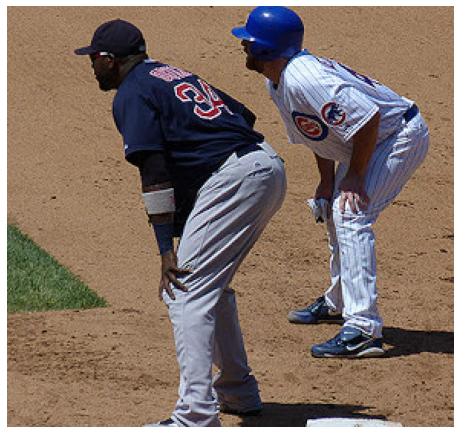

In [ ]:
im_orig = imread('data/baseball2.jpg')
pylab.figure(figsize=(8,8))
pylab.axis('off')
pylab.imshow(im_orig)

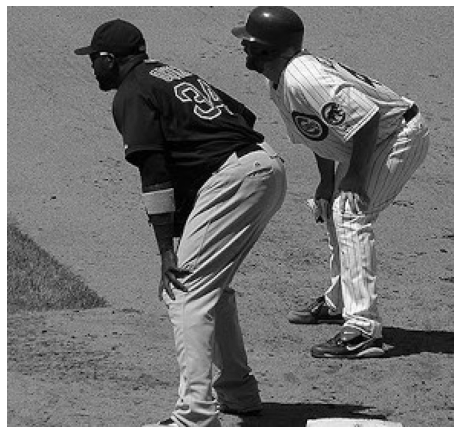

In [ ]:
im_gray = rgb2gray(im_orig)
pylab.figure(figsize=(8,8))
plt.axis('off')
pylab.imshow(im_gray, cmap=plt.cm.gray)

Trabajaremos con una imagen de $100\times 100$. ¿Cómo construyo $X$? Lo verás próximamente...

In [ ]:
resized_im = Image.fromarray(imread('data/baseball2.jpg')).resize(size=(100, 100))
im = np.asarray(resized_im)
X = np.reshape(im, (-1, im.shape[-1])) 

In [ ]:
#construye X tomando el valor de cada canal, en cada pixel
print('imagen \n',im[:3,:3,:])
print('Arreglo \n',X[:3,])

imagen 
 [[[159 127 100]
  [155 124  97]
  [157 126  98]]

 [[156 124  99]
  [157 125 100]
  [157 126 100]]

 [[156 125  96]
  [159 128 100]
  [156 125  97]]]
Arreglo 
 [[159 127 100]
 [155 124  97]
 [157 126  98]]


In [ ]:
X.shape

(10000, 3)

In [ ]:
im.shape

(100, 100, 3)

Text(0.5, 1.0, 'contour (k=2)')

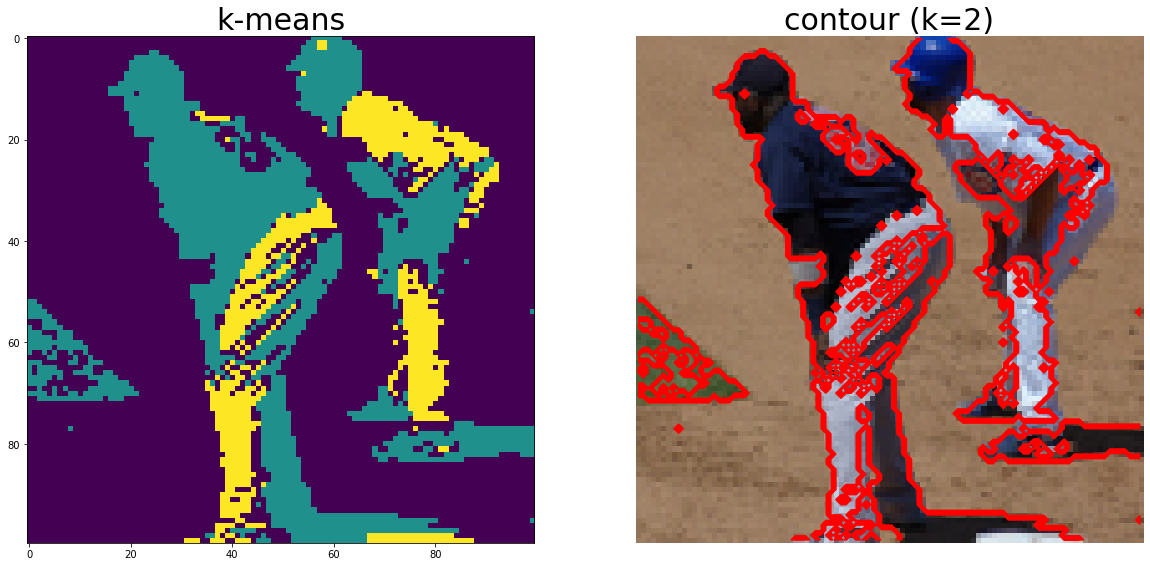

In [ ]:
k = 3
k_means = cluster.MiniBatchKMeans(n_clusters=k, random_state=10)
k_means.fit(X)
y_pred = k_means.predict(X)
labels = np.reshape(y_pred, im.shape[:2])
pylab.figure(figsize=(20,20))
pylab.subplot(121)
pylab.imshow(np.reshape(y_pred, im.shape[:2])), pylab.title('k-means', size=30)
pylab.subplot(122)
pylab.imshow(im), pylab.contour(labels == 0, colors='red'), pylab.axis('off')
pylab.title('contour (k=2)', size=30)

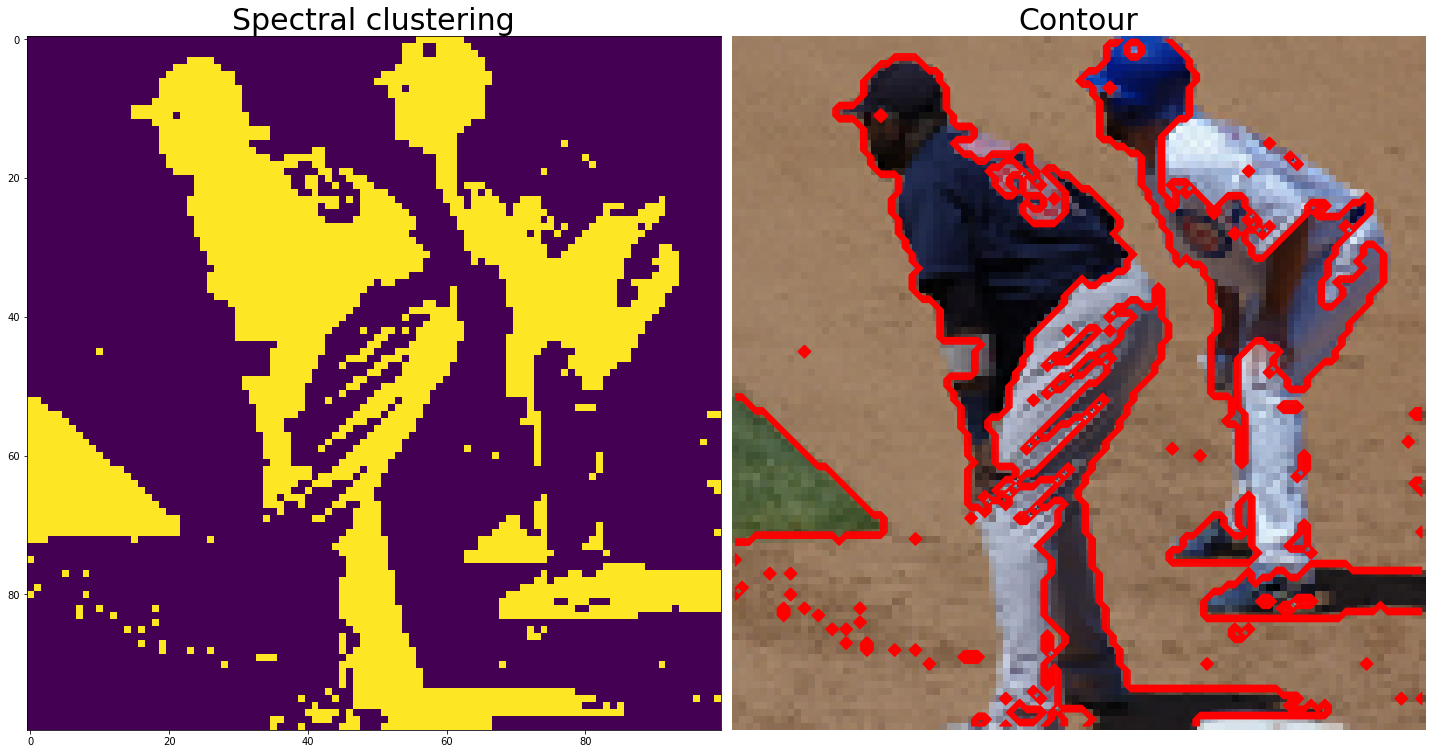

In [ ]:
spectral = cluster.SpectralClustering(n_clusters=k, eigen_solver='arpack', affinity="nearest_neighbors", 
                                      n_neighbors=800, random_state=10)
spectral.fit(X) 

y_pred = spectral.labels_.astype(int)
labels = np.reshape(y_pred, im.shape[:2])
pylab.figure(figsize=(20,20))
pylab.subplot(121)
pylab.imshow(np.reshape(y_pred, im.shape[:2])), pylab.title('Spectral clustering', size=30)
pylab.subplot(122)
pylab.imshow(im), 
pylab.contour(labels == 0, colors='red'), pylab.axis('off'), pylab.title('Contour', size=30), pylab.tight_layout()
pylab.show()

## Spectral clustering e imágenes. Ejemplo 2

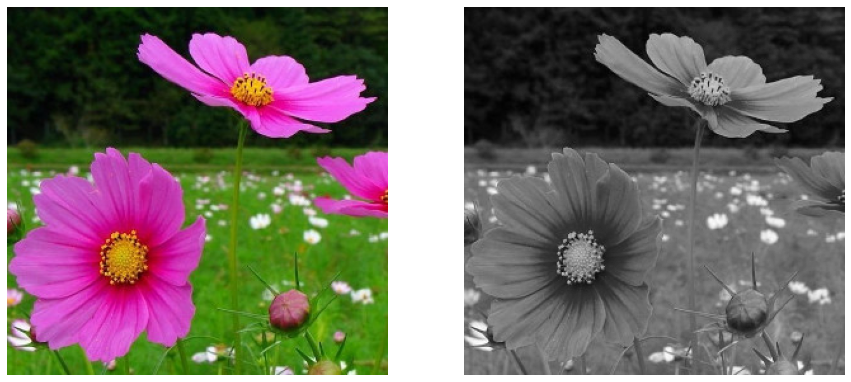

In [ ]:
im_orig = imread('data/flower2.jpg')
im_gray = rgb2gray(im_orig)
pylab.figure(figsize=(15,8))
pylab.subplot(121)
pylab.axis('off')
pylab.imshow(im_orig)
pylab.subplot(122)
plt.axis('off')
pylab.imshow(im_gray, cmap=plt.cm.gray)

In [ ]:
resized_im = Image.fromarray(imread('data/flower2.jpg')).resize(size=(100, 100))
im = np.asarray(resized_im)
X = np.reshape(im, (-1, im.shape[-1])) 

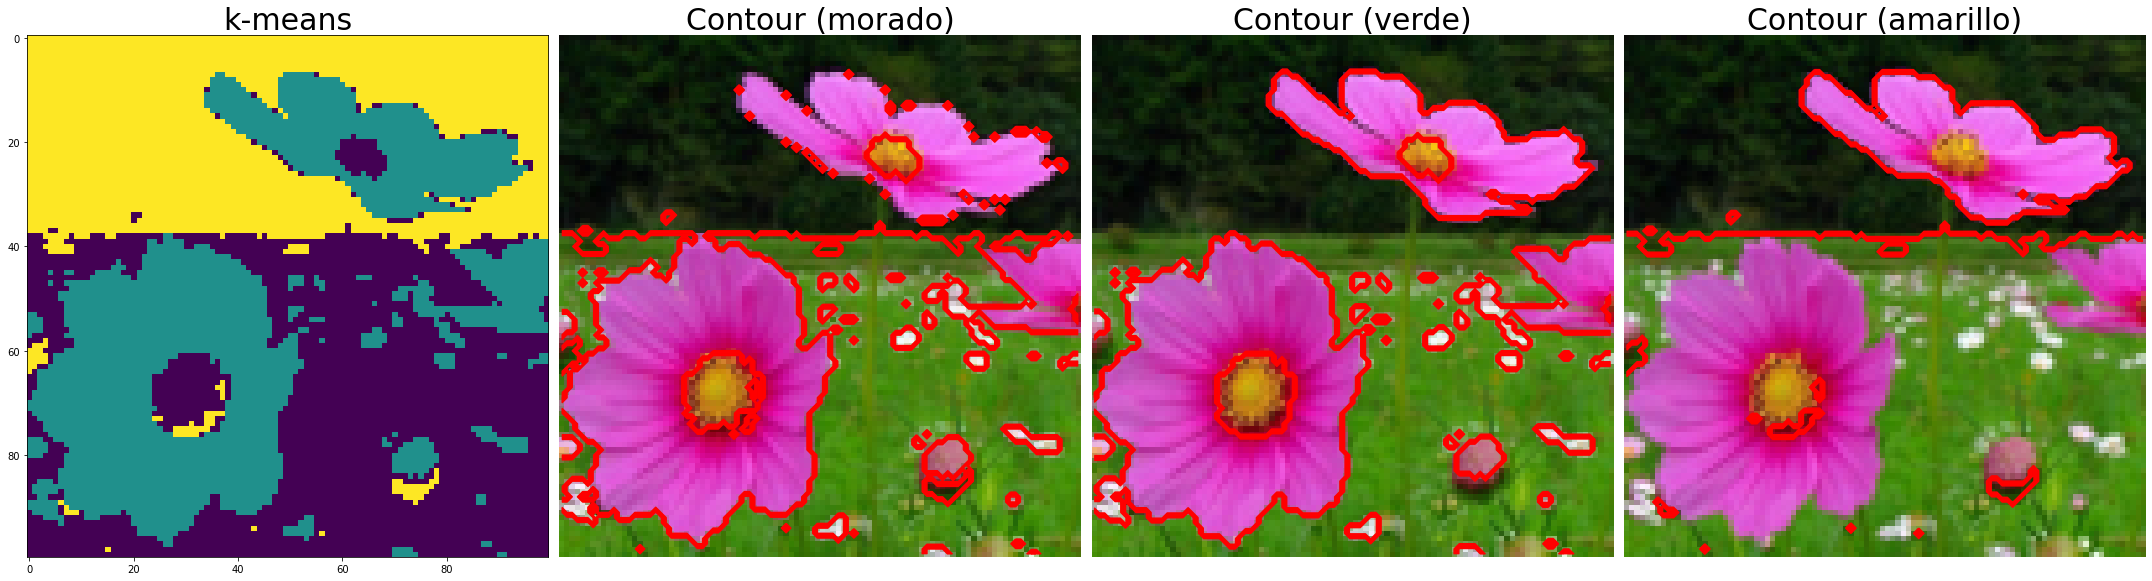

In [ ]:
k = 3
k_means = cluster.MiniBatchKMeans(n_clusters=k, random_state=10)
k_means.fit(X)
y_pred = k_means.predict(X)
labels = np.reshape(y_pred, im.shape[:2])

pylab.figure(figsize=(30,15))
pylab.subplot(141)
pylab.imshow(np.reshape(y_pred, im.shape[:2])), pylab.title('k-means', size=30)
pylab.subplot(142)
pylab.imshow(im), pylab.contour(labels == 0, colors='red'), pylab.axis('off'), pylab.title('Contour (morado)', size=30), pylab.tight_layout()
pylab.subplot(143)
pylab.imshow(im), pylab.contour(labels == 1, colors='red'), pylab.axis('off'), pylab.title('Contour (verde)', size=30), pylab.tight_layout()
pylab.subplot(144)
pylab.imshow(im), pylab.contour(labels == 2, colors='red'), pylab.axis('off'), pylab.title('Contour (amarillo)', size=30), pylab.tight_layout()
pylab.show()

In [ ]:
spectral = cluster.SpectralClustering(n_clusters=k, eigen_solver='arpack', affinity="nearest_neighbors", 
                                      n_neighbors=100, random_state=10)
spectral.fit(X) 
y_pred = spectral.labels_.astype(int)

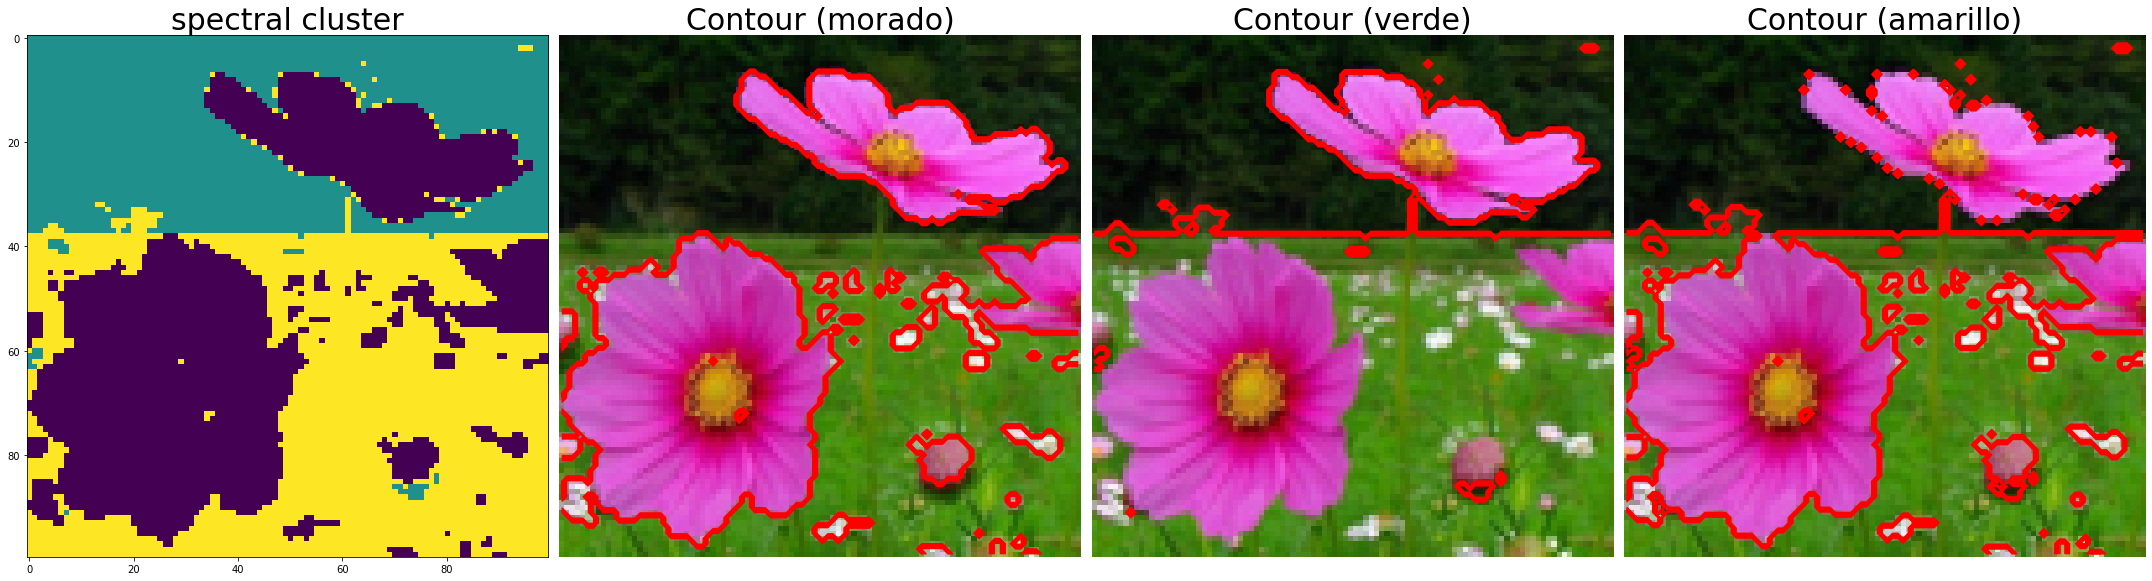

In [ ]:
labels = np.reshape(y_pred, im.shape[:2])
pylab.figure(figsize=(30,15))
pylab.subplot(141)
pylab.imshow(np.reshape(y_pred, im.shape[:2])), pylab.title('spectral cluster', size=30)
pylab.subplot(142)
pylab.imshow(im), pylab.contour(labels == 0, colors='red'), pylab.axis('off'), pylab.title('Contour (morado)', size=30), pylab.tight_layout()
pylab.subplot(143)
pylab.imshow(im), pylab.contour(labels == 1, colors='red'), pylab.axis('off'), pylab.title('Contour (verde)', size=30), pylab.tight_layout()
pylab.subplot(144)
pylab.imshow(im), pylab.contour(labels == 2, colors='red'), pylab.axis('off'), pylab.title('Contour (amarillo)', size=30), pylab.tight_layout()
pylab.show()

## Spectral clustering e imágenes. Ejemplo 3

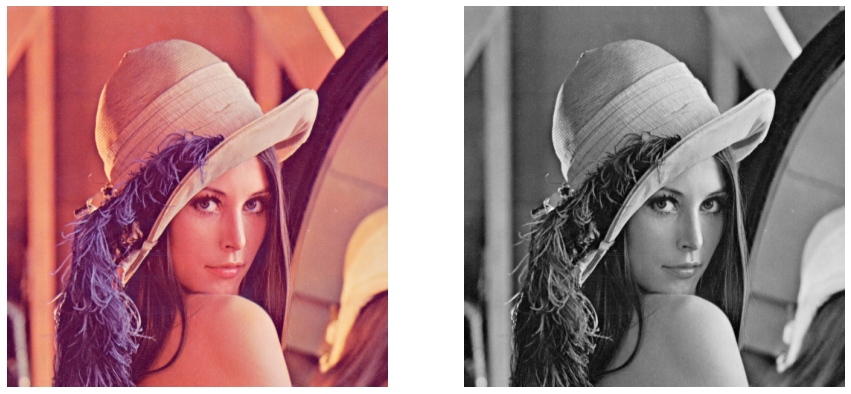

In [ ]:
im_orig = imread('data/lena.jpg')
im_gray = rgb2gray(im_orig)
pylab.figure(figsize=(15,8))
pylab.subplot(121)
pylab.axis('off')
pylab.imshow(im_orig)
pylab.subplot(122)
plt.axis('off')
pylab.imshow(im_gray, cmap=plt.cm.gray);

In [ ]:
resized_im = Image.fromarray(imread('data/lena.jpg')).resize(size=(100, 100))
im = np.asarray(resized_im)
X = np.reshape(im, (-1, im.shape[-1])) 

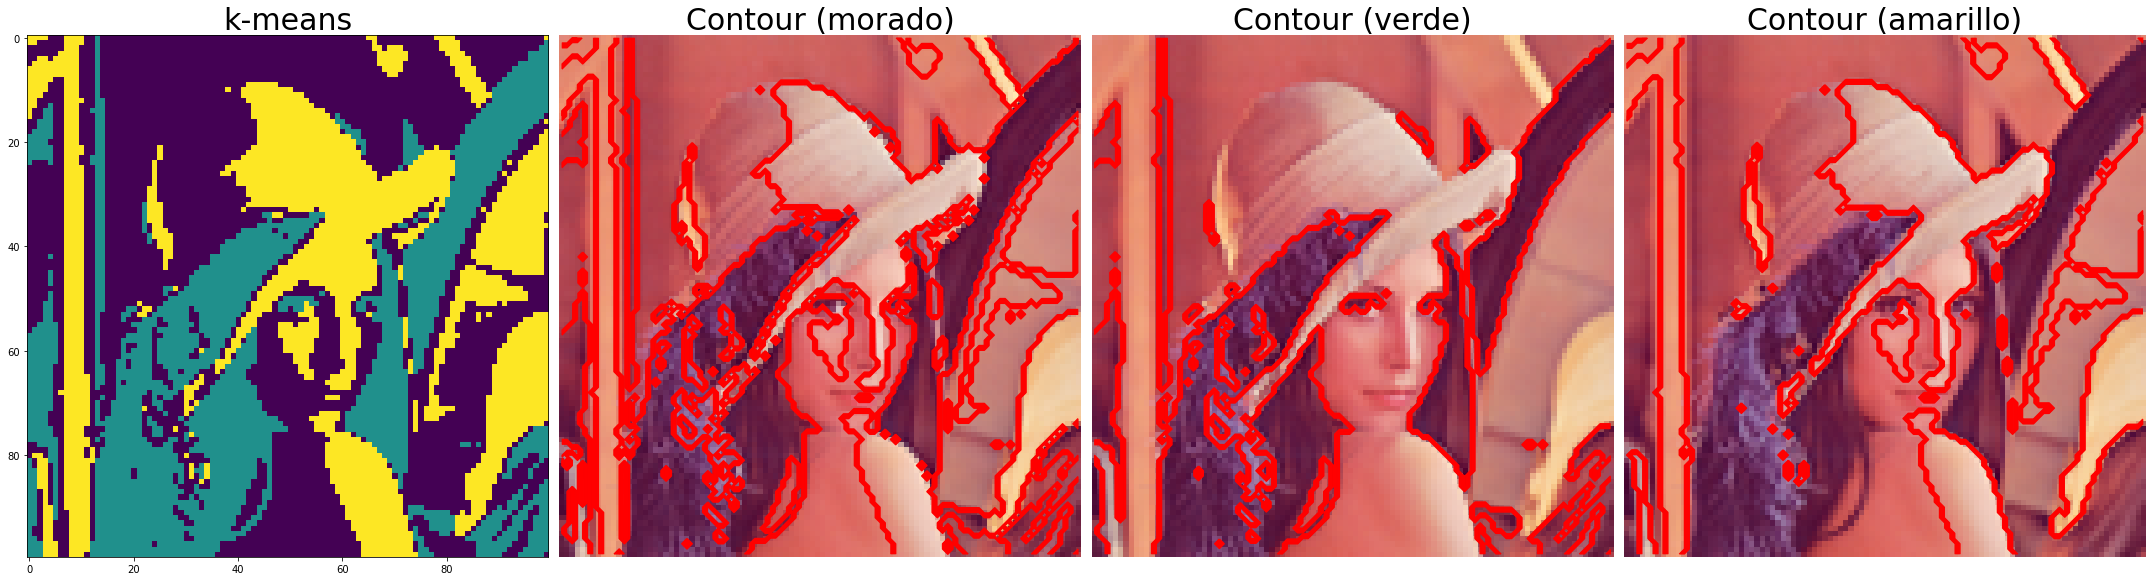

In [ ]:
k = 3
k_means = cluster.MiniBatchKMeans(n_clusters=k, random_state=0)
k_means.fit(X)
y_pred = k_means.predict(X)
labels = np.reshape(y_pred, im.shape[:2])
pylab.figure(figsize=(30,15))
pylab.subplot(141)
pylab.imshow(np.reshape(y_pred, im.shape[:2])), pylab.title('k-means', size=30)
pylab.subplot(142)
pylab.imshow(im), pylab.contour(labels == 0, colors='red'), pylab.axis('off'), pylab.title('Contour (morado)', size=30), pylab.tight_layout()
pylab.subplot(143)
pylab.imshow(im), pylab.contour(labels == 1, colors='red'), pylab.axis('off'), pylab.title('Contour (verde)', size=30), pylab.tight_layout()
pylab.subplot(144)
pylab.imshow(im), pylab.contour(labels == 2, colors='red'), pylab.axis('off'), pylab.title('Contour (amarillo)', size=30), pylab.tight_layout()
pylab.show()

In [ ]:
spectral = cluster.SpectralClustering(n_clusters=k, eigen_solver='arpack', affinity="nearest_neighbors", 
                                      n_neighbors=800, random_state=0)
spectral.fit(X) 
y_pred = spectral.labels_.astype(int)

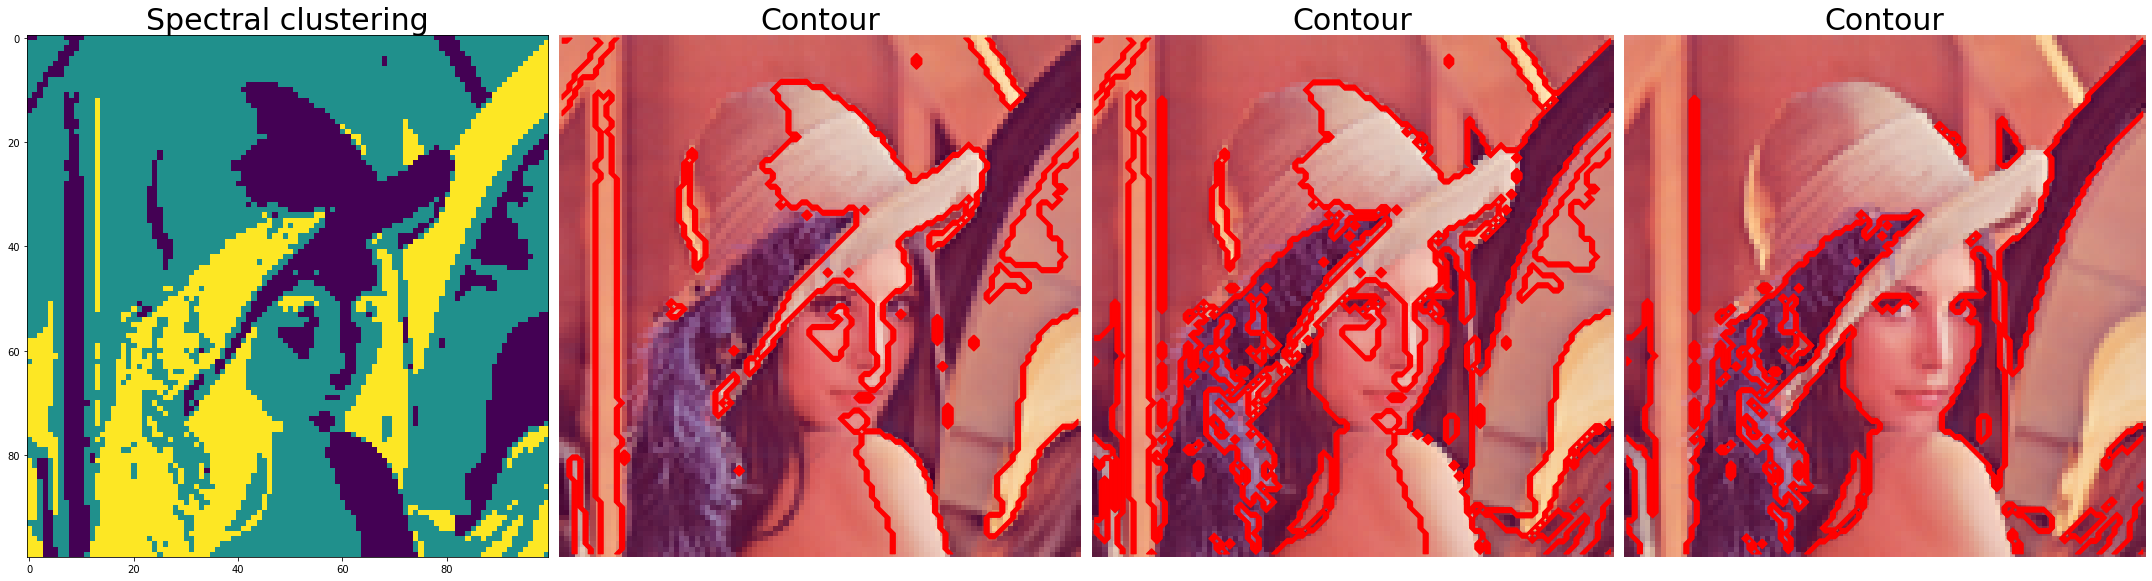

In [ ]:
labels = np.reshape(y_pred, im.shape[:2])
pylab.figure(figsize=(30,15))
pylab.subplot(141)
pylab.imshow(np.reshape(y_pred, im.shape[:2])), pylab.title('Spectral clustering', size=30)
pylab.subplot(142)
pylab.imshow(im), pylab.contour(labels == 0, colors='red'), pylab.axis('off'), pylab.title('Contour', size=30), pylab.tight_layout()
pylab.subplot(143)
pylab.imshow(im), pylab.contour(labels == 1, colors='red'), pylab.axis('off'), pylab.title('Contour', size=30), pylab.tight_layout()
pylab.subplot(144)
pylab.imshow(im), pylab.contour(labels == 2, colors='red'), pylab.axis('off'), pylab.title('Contour', size=30), pylab.tight_layout()
pylab.show()

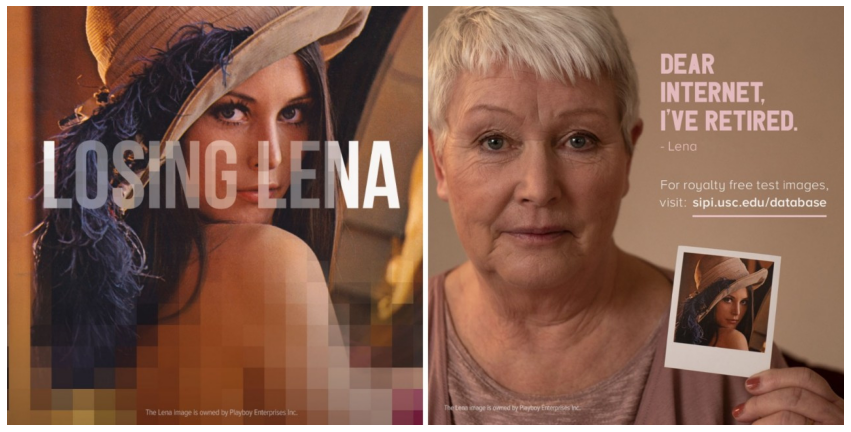

In [ ]:
im_orig = imread('data/losing_lena.jpg')
pylab.figure(figsize=(15,10))
pylab.axis('off')
pylab.imshow(im_orig);